##### Steps for reading in dataset (following download), initial QC, dim reduction/clustering and saving out the myeloid cluster for **GSE197177**

file previously downloaded:
GSE197177_RAW.tar

unzipped using 
``` bash
tar -xvf GSE197177_RAW.tar
```

This gives the following files: 
* GSM5910784_Case1-YF_barcodes.tsv.gz
* GSM5910784_Case1-YF_features.tsv.gz
* GSM5910784_Case1-YF_matrix.mtx.gz
* GSM5910785_Case1-ZY_barcodes.tsv.gz
* GSM5910785_Case1-ZY_features.tsv.gz
* GSM5910785_Case1-ZY_matrix.mtx.gz
* GSM5910786_Case2-ZC_barcodes.tsv.gz
* GSM5910786_Case2-ZC_features.tsv.gz
* GSM5910786_Case2-ZC_matrix.mtx.gz
* GSM5910787_Case2-YF_barcodes.tsv.gz
* GSM5910787_Case2-YF_features.tsv.gz
* GSM5910787_Case2-YF_matrix.mtx.gz
* GSM5910788_Case2-ZY_barcodes.tsv.gz
* GSM5910788_Case2-ZY_features.tsv.gz
* GSM5910788_Case2-ZY_matrix.mtx.gz
* GSM5910789_Case3-YF_barcodes.tsv.gz
* GSM5910789_Case3-YF_features.tsv.gz
* GSM5910789_Case3-YF_matrix.mtx.gz
* GSM5910790_Case3-ZY_barcodes.tsv.gz
* GSM5910790_Case3-ZY_features.tsv.gz
* GSM5910790_Case3-ZY_matrix.mtx.gz
* GSM5910791_Case4-ZY_barcodes.tsv.gz
* GSM5910791_Case4-ZY_features.tsv.gz
* GSM5910791_Case4-ZY_matrix.mtx.gz

Files were then organised into seperate folders for each patient and named with correct file names.

Sample codes (from GEO):
* ZC: normal pancreatic tissue
* YF: pancreatic tumors
* ZY: hepatic metastases

In [1]:
#set wd
getwd()
setwd('/scratch/user/s4436039/scdata/GSE197177')
getwd()

[1] "/scratch/user/s4436039/Nikita-project"

[1] "/scratch/user/s4436039/scdata/GSE197177"

In [2]:
#Load packages
library(dplyr)
library(Seurat)
library(patchwork)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect




In [3]:
#load all datasets
PDAC_Case1_YF.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE197177/Case1-YF")
PDAC_Case1_ZY.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE197177/Case1-ZY")
PDAC_Case2_YF.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE197177/Case2-YF")
PDAC_Case2_ZC.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE197177/Case2-ZC")
PDAC_Case2_ZY.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE197177/Case2-ZY")
PDAC_Case3_YF.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE197177/Case3-YF")
PDAC_Case3_ZY.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE197177/Case3-ZY")
PDAC_Case4_ZY.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE197177/Case4-ZY")

In [4]:
#Add dataset info to colnames
colnames(PDAC_Case1_YF.data) <- paste0("GSE197177_Case1-YF_", colnames(PDAC_Case1_YF.data))
colnames(PDAC_Case1_ZY.data) <- paste0("GSE197177_Case1-ZY_", colnames(PDAC_Case1_ZY.data))
colnames(PDAC_Case2_YF.data) <- paste0("GSE197177_Case2-YF_", colnames(PDAC_Case2_YF.data))
colnames(PDAC_Case2_ZC.data) <- paste0("GSE197177_Case2-ZC_", colnames(PDAC_Case2_ZC.data))
colnames(PDAC_Case2_ZY.data) <- paste0("GSE197177_Case2-ZY_", colnames(PDAC_Case2_ZY.data))
colnames(PDAC_Case3_YF.data) <- paste0("GSE197177_Case3-YF_", colnames(PDAC_Case3_YF.data))
colnames(PDAC_Case3_ZY.data) <- paste0("GSE197177_Case3-ZY_", colnames(PDAC_Case3_ZY.data))
colnames(PDAC_Case4_ZY.data) <- paste0("GSE197177_Case4-ZY_", colnames(PDAC_Case4_ZY.data))

In [5]:
head(colnames(PDAC_Case4_ZY.data))

[1] "GSE197177_Case4-ZY_AAACCCATCCACTTCG-1"
[2] "GSE197177_Case4-ZY_AAACGAAAGTAGCCAG-1"
[3] "GSE197177_Case4-ZY_AAACGAACAACACAAA-1"
[4] "GSE197177_Case4-ZY_AAACGAACAGTCTACA-1"
[5] "GSE197177_Case4-ZY_AAACGAAGTTCCACGG-1"
[6] "GSE197177_Case4-ZY_AAACGCTTCGTAATGC-1"

In [6]:
#create seperate seurat object for each sample
PDAC_Case1_YF <- CreateSeuratObject(counts = PDAC_Case1_YF.data, project = "GSE197177", min.features = 200)

#add metadata to sample
PDAC_Case1_YF@meta.data$sample_type <- "tumour"
PDAC_Case1_YF@meta.data$cancer_type <- "PDAC"
PDAC_Case1_YF@meta.data$patient_id <- "Case1"
PDAC_Case1_YF@meta.data$sample_id <- "GSE197177_PDAC_Case1_tumour"

In [8]:
#Repeat for remaining samples

#create seperate seurat object for each sample
PDAC_Case1_ZY <- CreateSeuratObject(counts = PDAC_Case1_ZY.data, project = "GSE197177", min.features = 200)

#add metadata to sample
PDAC_Case1_ZY@meta.data$sample_type <- "hepatic_mets"
PDAC_Case1_ZY@meta.data$cancer_type <- "PDAC"
PDAC_Case1_ZY@meta.data$patient_id <- "Case1"
PDAC_Case1_ZY@meta.data$sample_id <- "GSE197177_PDAC_Case1_mets"

#create seperate seurat object for each sample
PDAC_Case2_YF <- CreateSeuratObject(counts = PDAC_Case2_YF.data, project = "GSE197177", min.features = 200)

#add metadata to sample
PDAC_Case2_YF@meta.data$sample_type <- "tumour"
PDAC_Case2_YF@meta.data$cancer_type <- "PDAC"
PDAC_Case2_YF@meta.data$patient_id <- "Case2"
PDAC_Case2_YF@meta.data$sample_id <- "GSE197177_PDAC_Case2_tumour"

#create seperate seurat object for each sample
PDAC_Case2_ZC <- CreateSeuratObject(counts = PDAC_Case2_ZC.data, project = "GSE197177", min.features = 200)

#add metadata to sample
PDAC_Case2_ZC@meta.data$sample_type <- "healthy_pancreas"
PDAC_Case2_ZC@meta.data$cancer_type <- "PDAC"
PDAC_Case2_ZC@meta.data$patient_id <- "Case2"
PDAC_Case2_ZC@meta.data$sample_id <- "GSE197177_PDAC_Case2_healthy"

#create seperate seurat object for each sample
PDAC_Case2_ZY <- CreateSeuratObject(counts = PDAC_Case2_ZY.data, project = "GSE197177", min.features = 200)

#add metadata to sample
PDAC_Case2_ZY@meta.data$sample_type <- "hepatic_mets"
PDAC_Case2_ZY@meta.data$cancer_type <- "PDAC"
PDAC_Case2_ZY@meta.data$patient_id <- "Case2"
PDAC_Case2_ZY@meta.data$sample_id <- "GSE197177_PDAC_Case2_mets"

#create seperate seurat object for each sample
PDAC_Case3_YF <- CreateSeuratObject(counts = PDAC_Case3_YF.data, project = "GSE197177", min.features = 200)

#add metadata to sample
PDAC_Case3_YF@meta.data$sample_type <- "tumour"
PDAC_Case3_YF@meta.data$cancer_type <- "PDAC"
PDAC_Case3_YF@meta.data$patient_id <- "Case3"
PDAC_Case3_YF@meta.data$sample_id <- "GSE197177_PDAC_Case3_tumour"

#create seperate seurat object for each sample
PDAC_Case3_ZY <- CreateSeuratObject(counts = PDAC_Case3_ZY.data, project = "GSE197177", min.features = 200)

#add metadata to sample
PDAC_Case3_ZY@meta.data$sample_type <- "hepatic_mets"
PDAC_Case3_ZY@meta.data$cancer_type <- "PDAC"
PDAC_Case3_ZY@meta.data$patient_id <- "Case3"
PDAC_Case3_ZY@meta.data$sample_id <- "GSE197177_PDAC_Case3_mets"

#create seperate seurat object for each sample
PDAC_Case4_ZY <- CreateSeuratObject(counts = PDAC_Case4_ZY.data, project = "GSE197177", min.features = 200)

#add metadata to sample
PDAC_Case4_ZY@meta.data$sample_type <- "hepatic_mets"
PDAC_Case4_ZY@meta.data$cancer_type <- "PDAC"
PDAC_Case4_ZY@meta.data$patient_id <- "Case4"
PDAC_Case4_ZY@meta.data$sample_id <- "GSE197177_PDAC_Case4_mets"

In [9]:
head(PDAC_Case2_ZC@meta.data)

orig.ident nCount_RNA nFeature_RNA
GSE197177_Case2-ZC_AAACCCAGTGACTGTT-1 GSE197177   1307       637        
GSE197177_Case2-ZC_AAACCCAGTTATCCAG-1 GSE197177   1843       942        
GSE197177_Case2-ZC_AAACCCAGTTCGTTCC-1 GSE197177   1413       734        
GSE197177_Case2-ZC_AAACGAAAGAGATTCA-1 GSE197177   2870      1254        
GSE197177_Case2-ZC_AAACGAAAGCGTCAAG-1 GSE197177  12648      1027        
GSE197177_Case2-ZC_AAACGAAAGTGCACAG-1 GSE197177   2671       827        
                                      sample_type      cancer_type patient_id
GSE197177_Case2-ZC_AAACCCAGTGACTGTT-1 healthy_pancreas PDAC        Case2     
GSE197177_Case2-ZC_AAACCCAGTTATCCAG-1 healthy_pancreas PDAC        Case2     
GSE197177_Case2-ZC_AAACCCAGTTCGTTCC-1 healthy_pancreas PDAC        Case2     
GSE197177_Case2-ZC_AAACGAAAGAGATTCA-1 healthy_pancreas PDAC        Case2     
GSE197177_Case2-ZC_AAACGAAAGCGTCAAG-1 healthy_pancreas PDAC        Case2     
GSE197177_Case2-ZC_AAACGAAAGTGCACAG-1 healthy_pancreas PDAC        Case2     
                                      sample_id                   
GSE197177_Case2-ZC_AAACCCAGTGACTGTT-1 GSE197177_PDAC_Case2_healthy
GSE197177_Case2-ZC_AAACCCAGTTATCCAG-1 GSE197177_PDAC_Case2_healthy
GSE197177_Case2-ZC_AAACCCAGTTCGTTCC-1 GSE197177_PDAC_Case2_healthy
GSE197177_Case2-ZC_AAACGAAAGAGATTCA-1 GSE197177_PDAC_Case2_healthy
GSE197177_Case2-ZC_AAACGAAAGCGTCAAG-1 GSE197177_PDAC_Case2_healthy
GSE197177_Case2-ZC_AAACGAAAGTGCACAG-1 GSE197177_PDAC_Case2_healthy

In [10]:
#Merge seurat objects

PDAC <- merge(PDAC_Case1_YF, y = c(PDAC_Case1_ZY, PDAC_Case2_YF, PDAC_Case2_ZC, PDAC_Case2_ZY, PDAC_Case3_YF, PDAC_Case3_ZY, PDAC_Case4_ZY), project = "GSE197177")

In [11]:
PDAC

An object of class Seurat 
33538 features across 81939 samples within 1 assay 
Active assay: RNA (33538 features, 0 variable features)
 8 layers present: counts.1, counts.2, counts.3, counts.4, counts.5, counts.6, counts.7, counts.8

In [12]:
#PDAC[["RNA"]] <- JoinLayers(PDAC)
#not needed until after integration ^

In [13]:
PDAC
head(PDAC@meta.data)
tail(PDAC@meta.data)

An object of class Seurat 
33538 features across 81939 samples within 1 assay 
Active assay: RNA (33538 features, 0 variable features)
 8 layers present: counts.1, counts.2, counts.3, counts.4, counts.5, counts.6, counts.7, counts.8

orig.ident nCount_RNA nFeature_RNA
GSE197177_Case1-YF_AAACCCAAGAGCACTG-1 GSE197177   4039       946        
GSE197177_Case1-YF_AAACCCAAGCTAATCC-1 GSE197177  20821      4845        
GSE197177_Case1-YF_AAACCCAAGGCTGTAG-1 GSE197177  12284      3575        
GSE197177_Case1-YF_AAACCCAAGTTGAATG-1 GSE197177   3451      1062        
GSE197177_Case1-YF_AAACCCACAAACAGGC-1 GSE197177   4832      1772        
GSE197177_Case1-YF_AAACCCACAACTAGAA-1 GSE197177   4951      1950        
                                      sample_type cancer_type patient_id
GSE197177_Case1-YF_AAACCCAAGAGCACTG-1 tumour      PDAC        Case1     
GSE197177_Case1-YF_AAACCCAAGCTAATCC-1 tumour      PDAC        Case1     
GSE197177_Case1-YF_AAACCCAAGGCTGTAG-1 tumour      PDAC        Case1     
GSE197177_Case1-YF_AAACCCAAGTTGAATG-1 tumour      PDAC        Case1     
GSE197177_Case1-YF_AAACCCACAAACAGGC-1 tumour      PDAC        Case1     
GSE197177_Case1-YF_AAACCCACAACTAGAA-1 tumour      PDAC        Case1     
                                      sample_id                  
GSE197177_Case1-YF_AAACCCAAGAGCACTG-1 GSE197177_PDAC_Case1_tumour
GSE197177_Case1-YF_AAACCCAAGCTAATCC-1 GSE197177_PDAC_Case1_tumour
GSE197177_Case1-YF_AAACCCAAGGCTGTAG-1 GSE197177_PDAC_Case1_tumour
GSE197177_Case1-YF_AAACCCAAGTTGAATG-1 GSE197177_PDAC_Case1_tumour
GSE197177_Case1-YF_AAACCCACAAACAGGC-1 GSE197177_PDAC_Case1_tumour
GSE197177_Case1-YF_AAACCCACAACTAGAA-1 GSE197177_PDAC_Case1_tumour

orig.ident nCount_RNA nFeature_RNA
GSE197177_Case4-ZY_TTTGATCGTCACTGAT-1 GSE197177  2107        861        
GSE197177_Case4-ZY_TTTGGAGCAACTTGGT-1 GSE197177   759        344        
GSE197177_Case4-ZY_TTTGGAGCAGTTCCAA-1 GSE197177  2748       1090        
GSE197177_Case4-ZY_TTTGTTGAGGGCAGTT-1 GSE197177   868        338        
GSE197177_Case4-ZY_TTTGTTGCAAGTGCAG-1 GSE197177   572        309        
GSE197177_Case4-ZY_TTTGTTGGTGTCTTAG-1 GSE197177  3720       1279        
                                      sample_type  cancer_type patient_id
GSE197177_Case4-ZY_TTTGATCGTCACTGAT-1 hepatic_mets PDAC        Case4     
GSE197177_Case4-ZY_TTTGGAGCAACTTGGT-1 hepatic_mets PDAC        Case4     
GSE197177_Case4-ZY_TTTGGAGCAGTTCCAA-1 hepatic_mets PDAC        Case4     
GSE197177_Case4-ZY_TTTGTTGAGGGCAGTT-1 hepatic_mets PDAC        Case4     
GSE197177_Case4-ZY_TTTGTTGCAAGTGCAG-1 hepatic_mets PDAC        Case4     
GSE197177_Case4-ZY_TTTGTTGGTGTCTTAG-1 hepatic_mets PDAC        Case4     
                                      sample_id                
GSE197177_Case4-ZY_TTTGATCGTCACTGAT-1 GSE197177_PDAC_Case4_mets
GSE197177_Case4-ZY_TTTGGAGCAACTTGGT-1 GSE197177_PDAC_Case4_mets
GSE197177_Case4-ZY_TTTGGAGCAGTTCCAA-1 GSE197177_PDAC_Case4_mets
GSE197177_Case4-ZY_TTTGTTGAGGGCAGTT-1 GSE197177_PDAC_Case4_mets
GSE197177_Case4-ZY_TTTGTTGCAAGTGCAG-1 GSE197177_PDAC_Case4_mets
GSE197177_Case4-ZY_TTTGTTGGTGTCTTAG-1 GSE197177_PDAC_Case4_mets

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


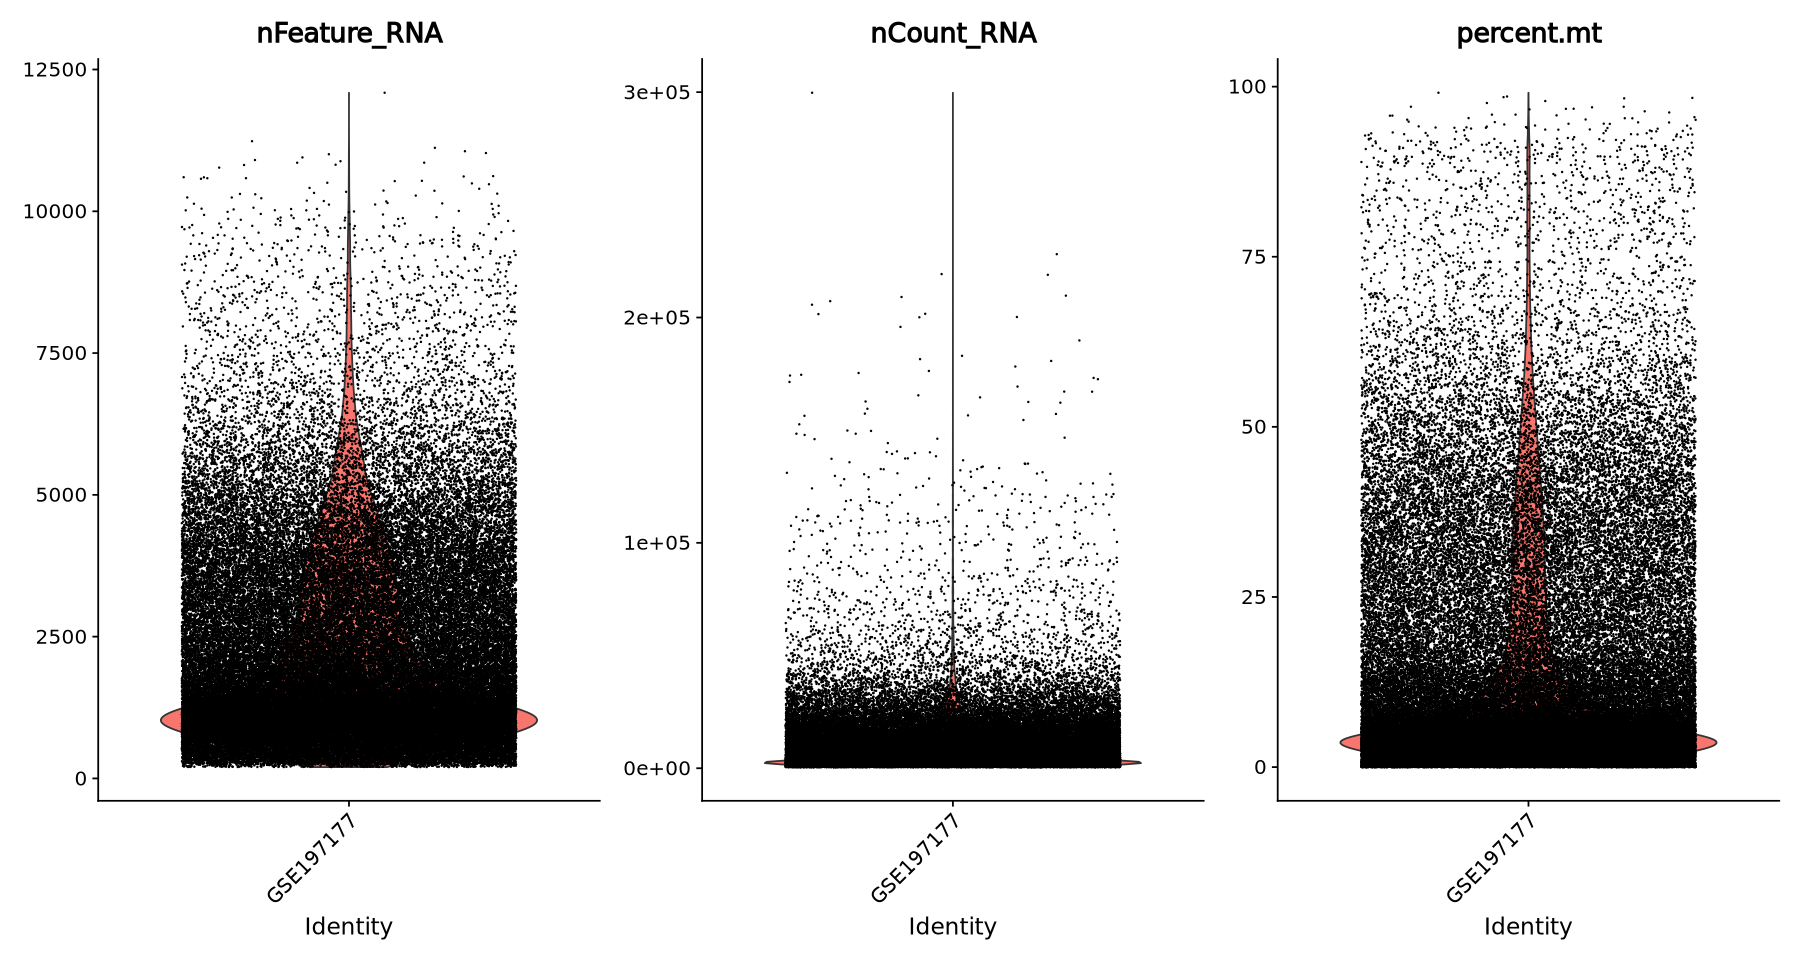

In [14]:
#QC Steps 
PDAC[["percent.mt"]] <- PercentageFeatureSet(PDAC, pattern = "^MT-")
#Visualise QC metrics
options(repr.plot.height=8, repr.plot.width=15)
VlnPlot(PDAC, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

In [15]:
#Normalise the data
PDAC <- NormalizeData(PDAC)
#Find variable features
PDAC <- FindVariableFeatures(PDAC, selection.method = "vst", nfeatures = 2000)
#Scale the data
PDAC <- ScaleData(PDAC, vars.to.regress = c("percent.mt", "nCount_RNA"))
#Run pca
PDAC <- RunPCA(PDAC, features = VariableFeatures(object = PDAC))

Normalizing layer: counts.1

Normalizing layer: counts.2

Normalizing layer: counts.3

Normalizing layer: counts.4

Normalizing layer: counts.5

Normalizing layer: counts.6

Normalizing layer: counts.7

Normalizing layer: counts.8

Finding variable features for layer counts.1

Finding variable features for layer counts.2

Finding variable features for layer counts.3

Finding variable features for layer counts.4

Finding variable features for layer counts.5

Finding variable features for layer counts.6

Finding variable features for layer counts.7

Finding variable features for layer counts.8

Regressing out percent.mt, nCount_RNA

Centering and scaling data matrix

PC_ 1 
Positive:  SPARC, COL1A2, CALD1, COL3A1, COL5A2, COL1A1, LUM, DCN, BGN, COL6A3 
	   AEBP1, CTHRC1, THBS2, COL6A2, COL5A1, CDH11, THY1, IGFBP7, FBN1, MMP2 
	   SULF1, ANTXR1, TAGLN, PRRX1, COL8A1, C1S, COL12A1, FSTL1, MXRA8, NTM 
Negative:  AGR2, MUC1, TFF1, KRT19, EPCAM, TFF2, TFF3, LGALS4, S100A14, KRT8 
	   TSPAN8, 

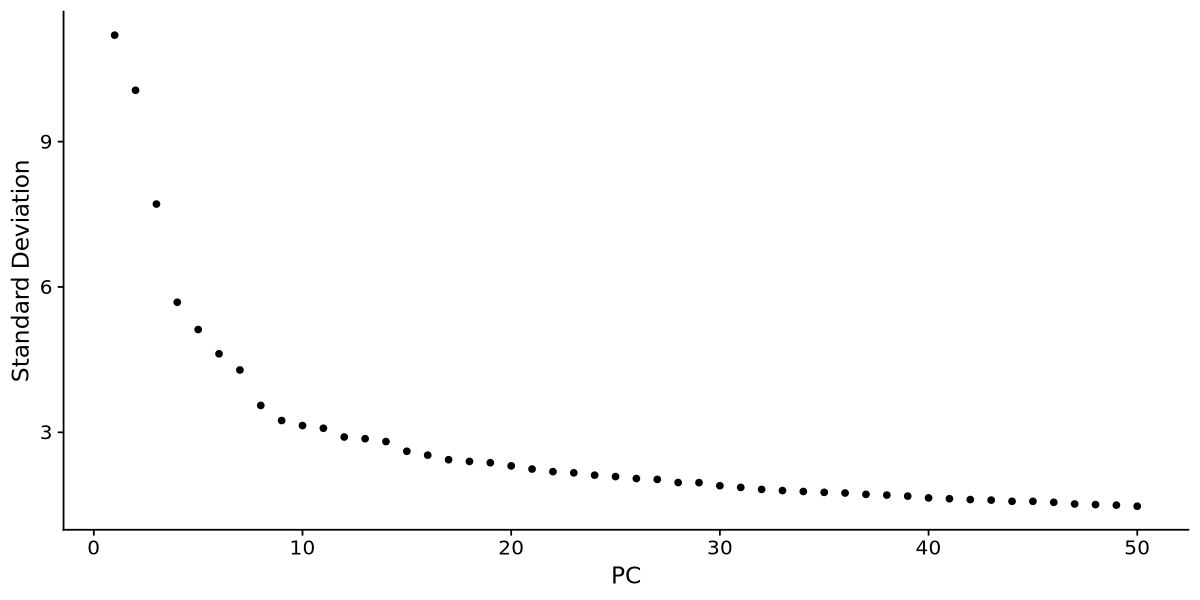

In [16]:
#make elbow plot
options(repr.plot.height=5, repr.plot.width=10)
ElbowPlot(PDAC, ndims=50)
#in GSE213243 decided to use 40 PC, staying consistent across datasets

In [17]:
#Find neighbours (make sure number matches no. features chosen above)
PDAC <- FindNeighbors(PDAC, dims = 1:40)

Computing nearest neighbor graph



Computing SNN



In [18]:
#Run UMAP
PDAC <- RunUMAP(PDAC, dims = 1:40)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”


15:57:22 UMAP embedding parameters a = 0.9922 b = 1.112

15:57:22 Read 81939 rows and found 40 numeric columns

15:57:22 Using Annoy for neighbor search, n_neighbors = 30

15:57:22 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

15:57:29 Writing NN index file to temp file /scratch/temp/9153722/RtmpRbtIWs/file31b42e72af5433

15:57:29 Searching Annoy index using 1 thread, search_k = 3000

15:57:55 Annoy recall = 100%

15:57:55 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

15:57:57 Initializing from normalized Laplacian + noise (using RSpectra)

15:58:02 Commencing optimization for 200 epochs, with 3740590 positive edges

15:58:32 Optimization finished



In [19]:
#Cluster, resolution here set to 0.2, originally tried 0.5 which gave 28 clusters, 0.2 gives 18
PDAC <- FindClusters(PDAC, resolution = 0.2)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 81939
Number of edges: 2923337

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9646
Number of communities: 20
Elapsed time: 26 seconds


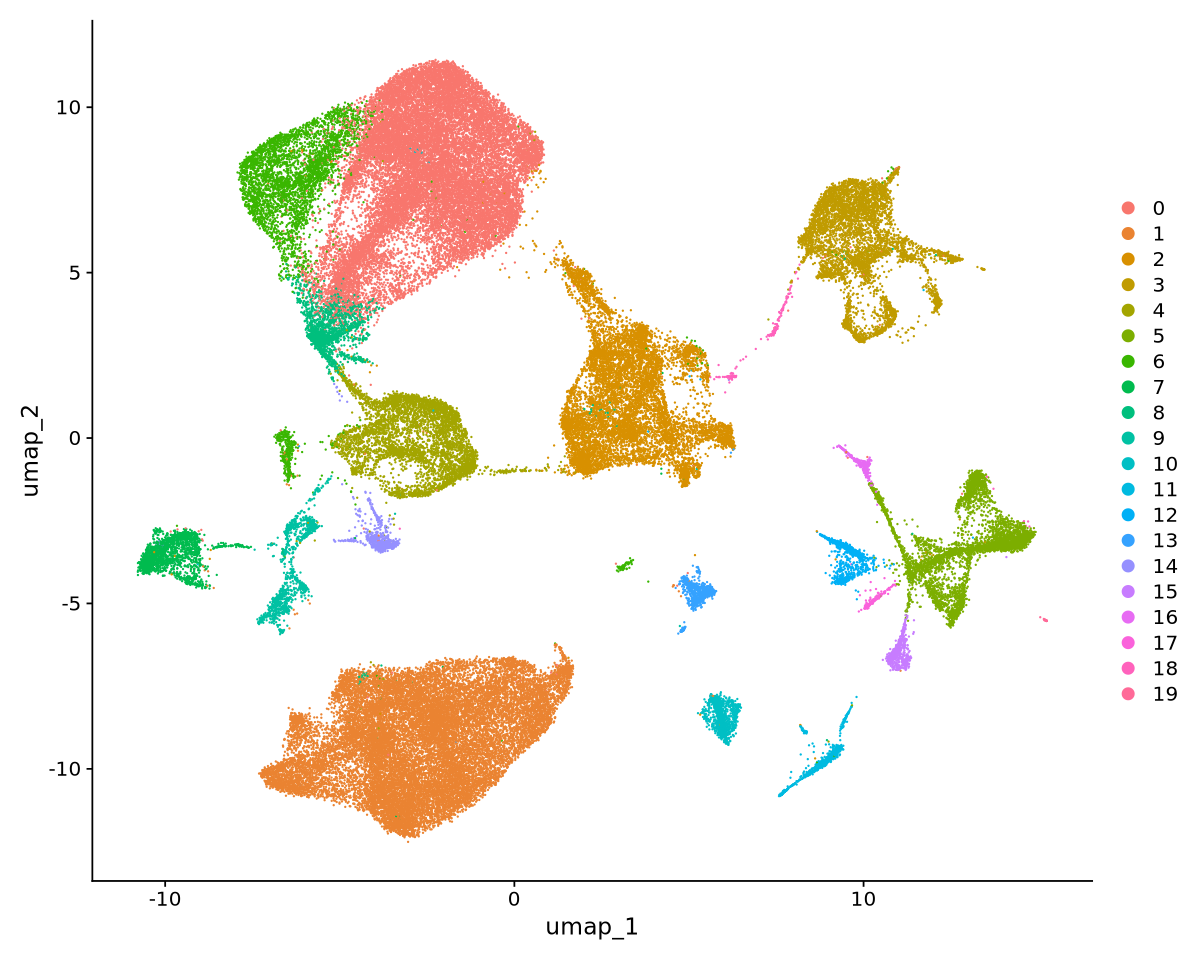

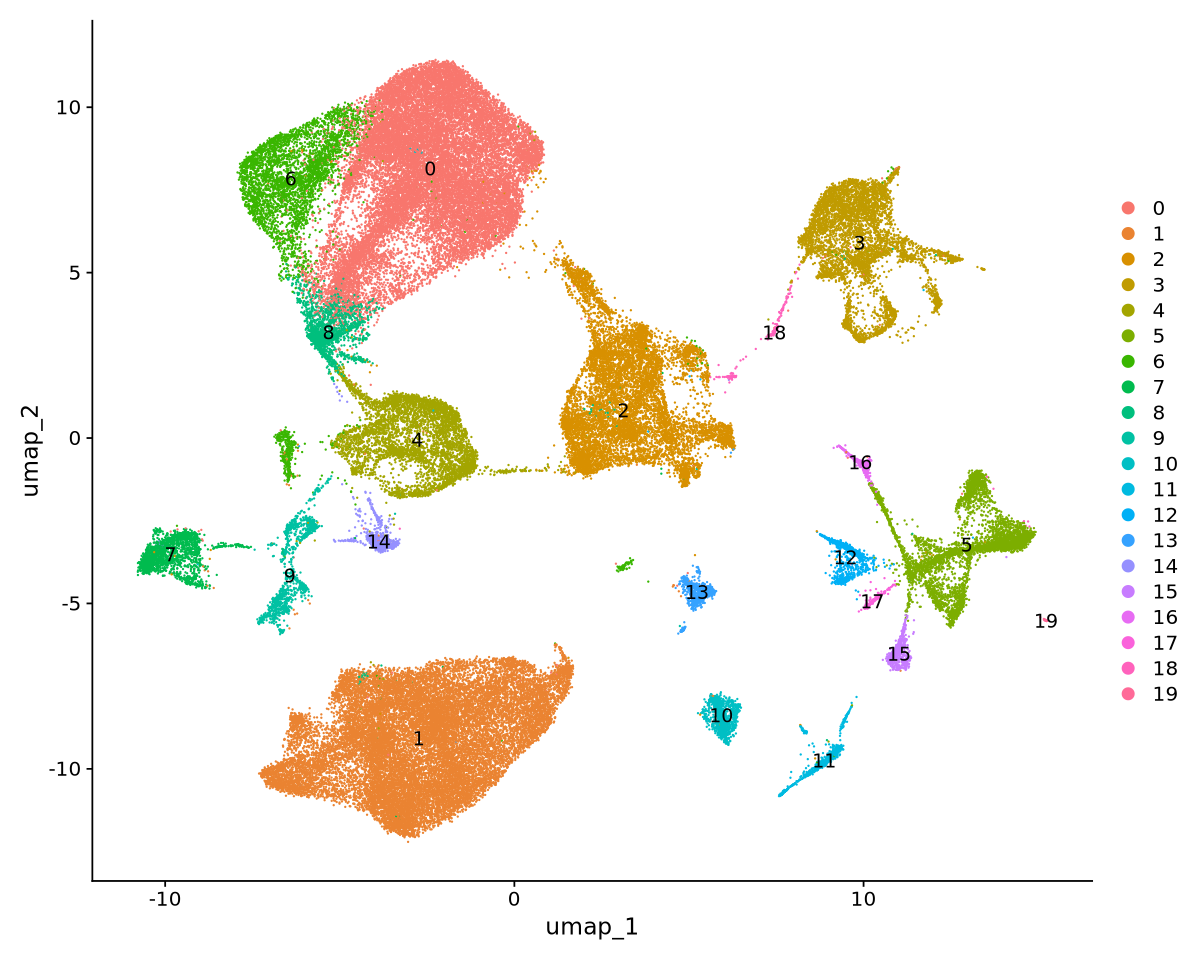

In [20]:
#Plot UMAP
options(repr.plot.height=8, repr.plot.width=10)
DimPlot(PDAC, reduction = "umap")
DimPlot(PDAC, reduction = "umap", label=TRUE)

In [21]:
#Save the object at this point so it can be loaded in without running steps above
saveRDS(PDAC, file = "/scratch/user/s4436039/scdata/GSE197177/GSE197177.RDS")

In [19]:
#Load in RDS
PDAC <- readRDS("/scratch/user/s4436039/scdata/GSE197177/GSE197177.RDS")

In [8]:
PDAC

An object of class Seurat 
25870 features across 81939 samples within 1 assay 
Active assay: RNA (25870 features, 2000 variable features)
 17 layers present: counts.1, counts.2, counts.3, counts.4, counts.5, counts.6, counts.7, counts.8, data.1, data.2, data.3, data.4, data.5, data.6, data.7, data.8, scale.data
 2 dimensional reductions calculated: pca, umap

#### Following section is to determine which cluster is the myeloid cells

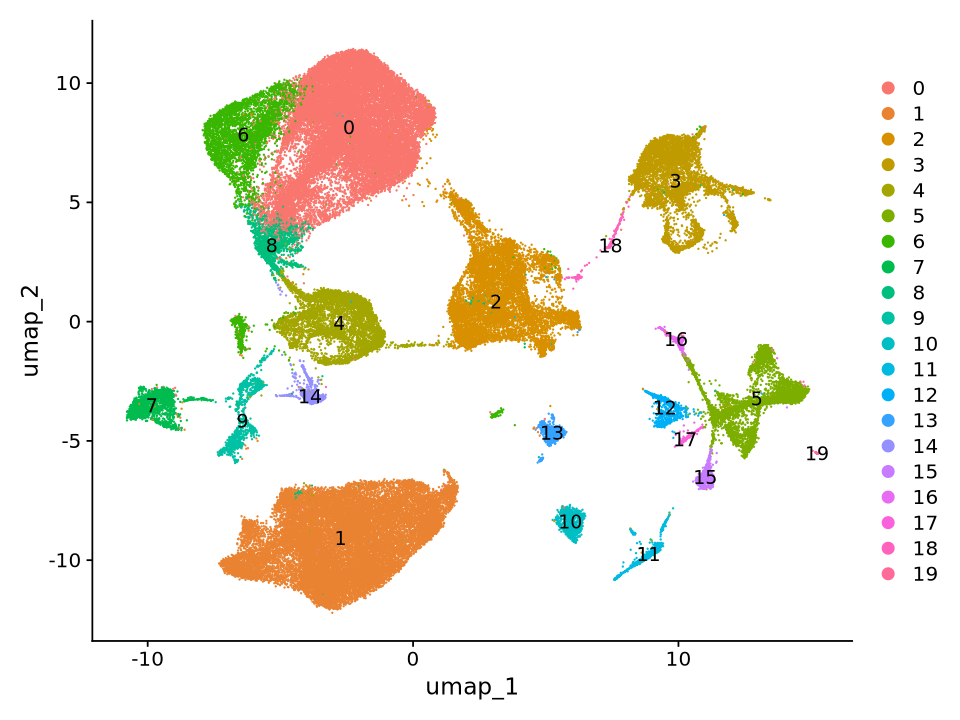

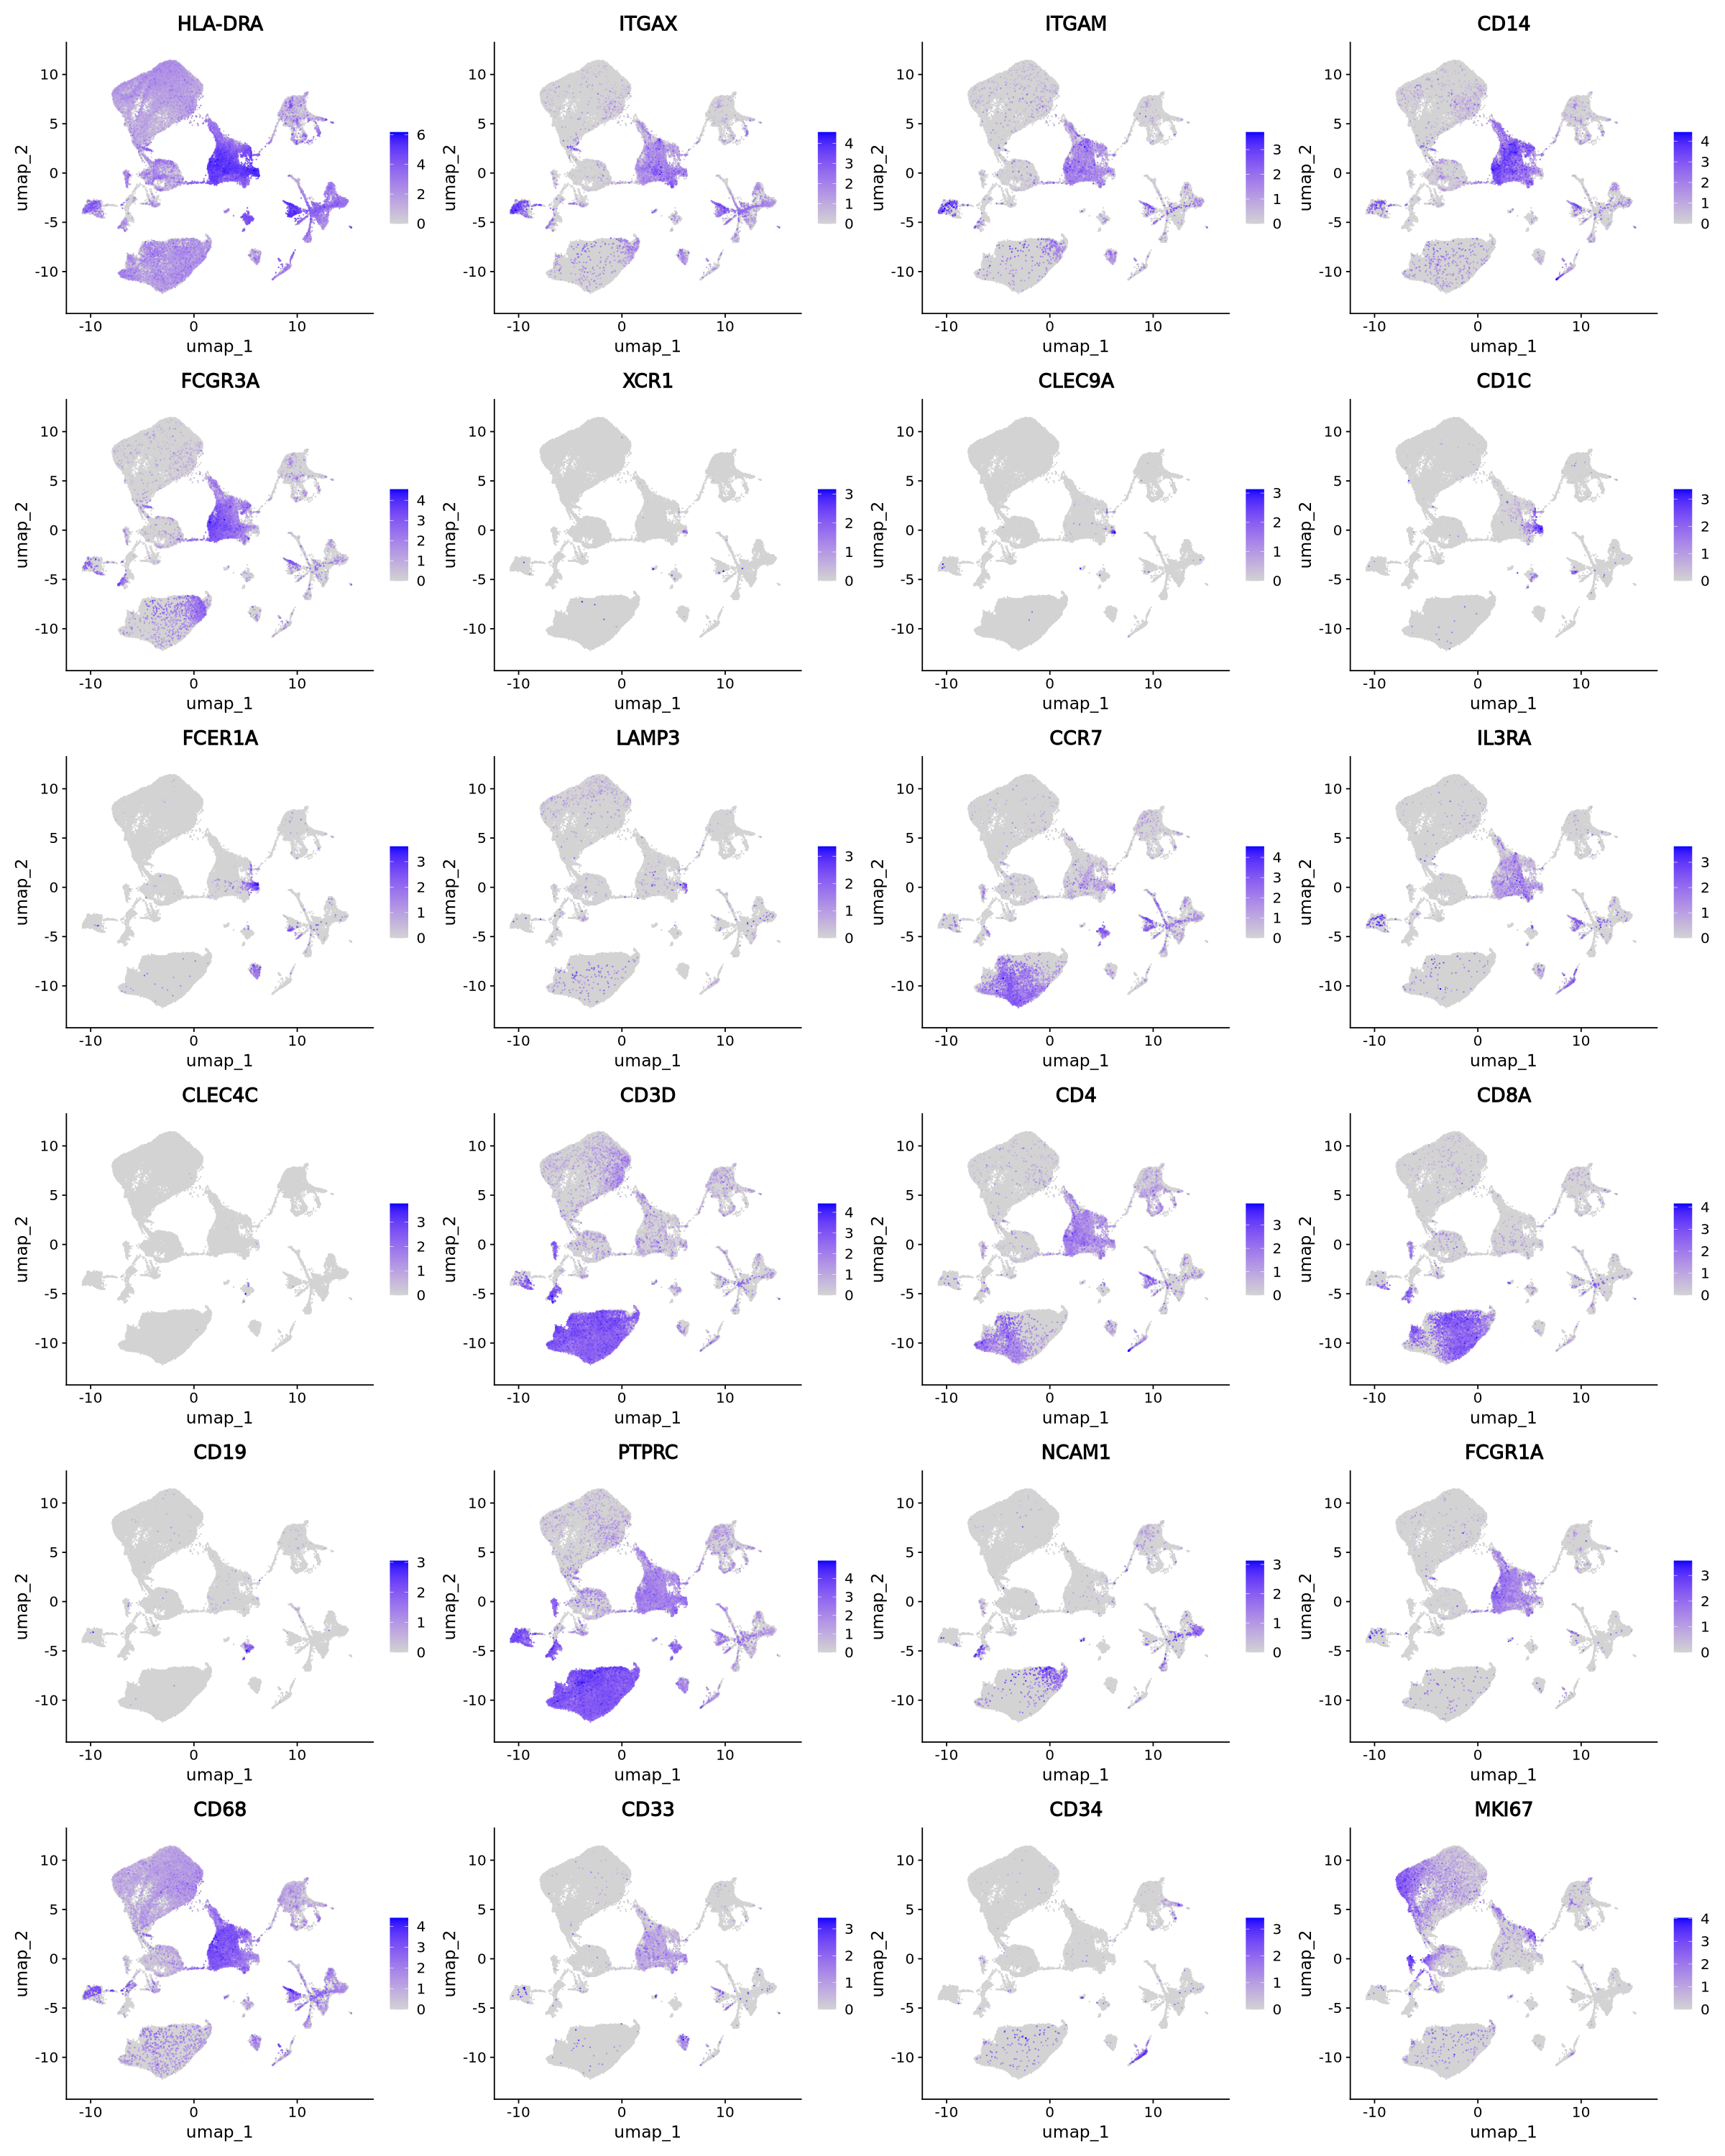

In [22]:
#plot genes over UMAP
options(repr.plot.height=6, repr.plot.width=8)
DimPlot(PDAC, reduction = "umap", label=TRUE)

options(repr.plot.height=25, repr.plot.width=20)
FeaturePlot(PDAC, features = c("HLA-DRA", "ITGAX", "ITGAM", "CD14", "FCGR3A", "XCR1", "CLEC9A", "CD1C", "FCER1A", "LAMP3", "CCR7", "IL3RA", "CLEC4C", "CD3D", "CD4", "CD8A", "CD19", "PTPRC", "NCAM1", "FCGR1A", "CD68", "CD33", "CD34", "MKI67"), order = TRUE)
     

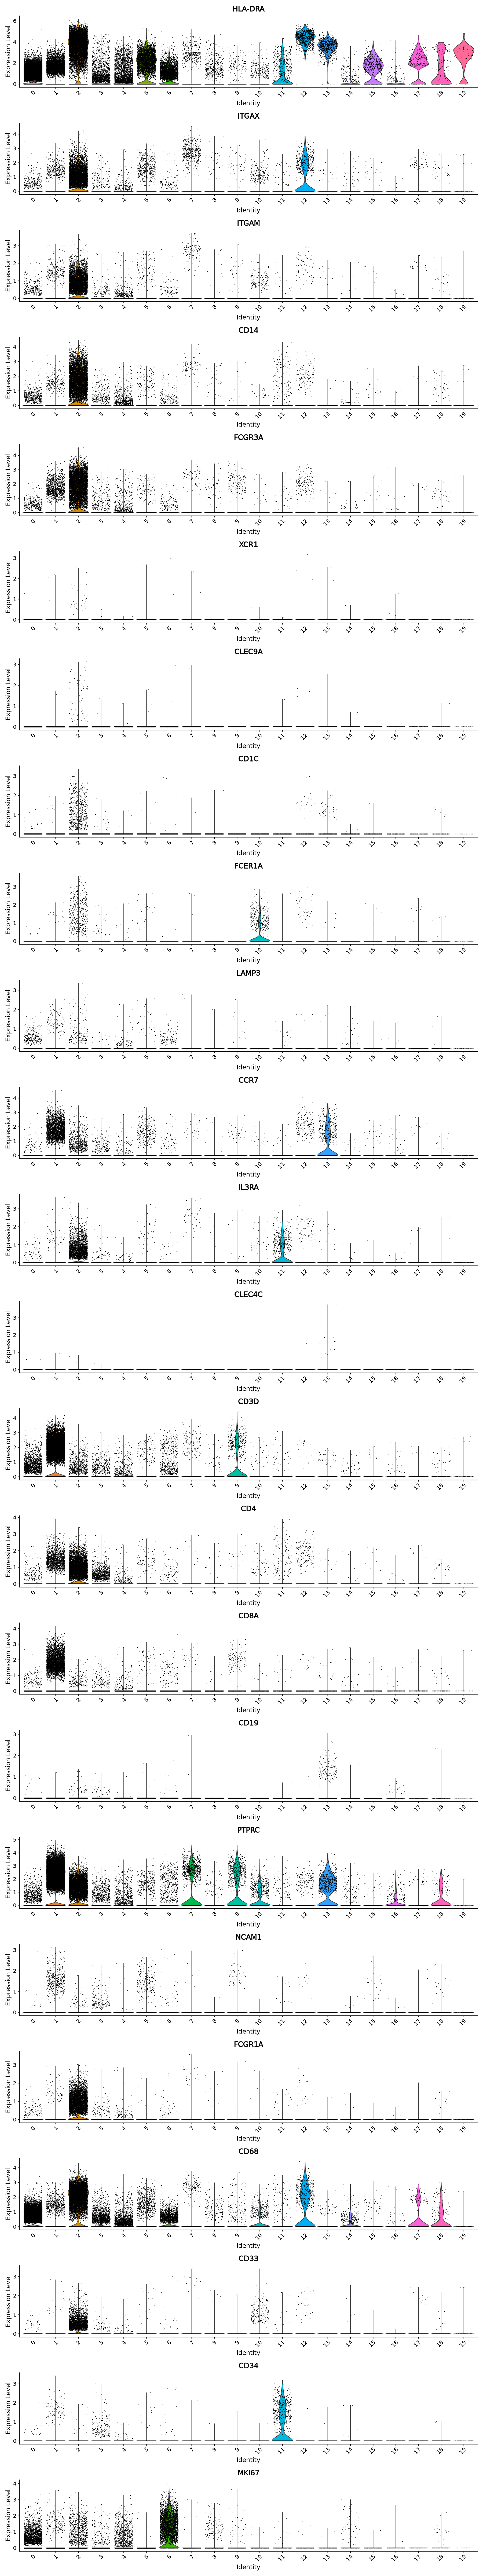

In [23]:
#Violin plots of classic markers
options(repr.plot.height=80, repr.plot.width=15)
VlnPlot(PDAC, features = c("HLA-DRA", "ITGAX", "ITGAM", "CD14", "FCGR3A", "XCR1", "CLEC9A", "CD1C", "FCER1A", "LAMP3", "CCR7", "IL3RA", "CLEC4C", "CD3D", "CD4", "CD8A", "CD19", "PTPRC", "NCAM1", "FCGR1A", "CD68", "CD33", "CD34", "MKI67"), ncol=1)

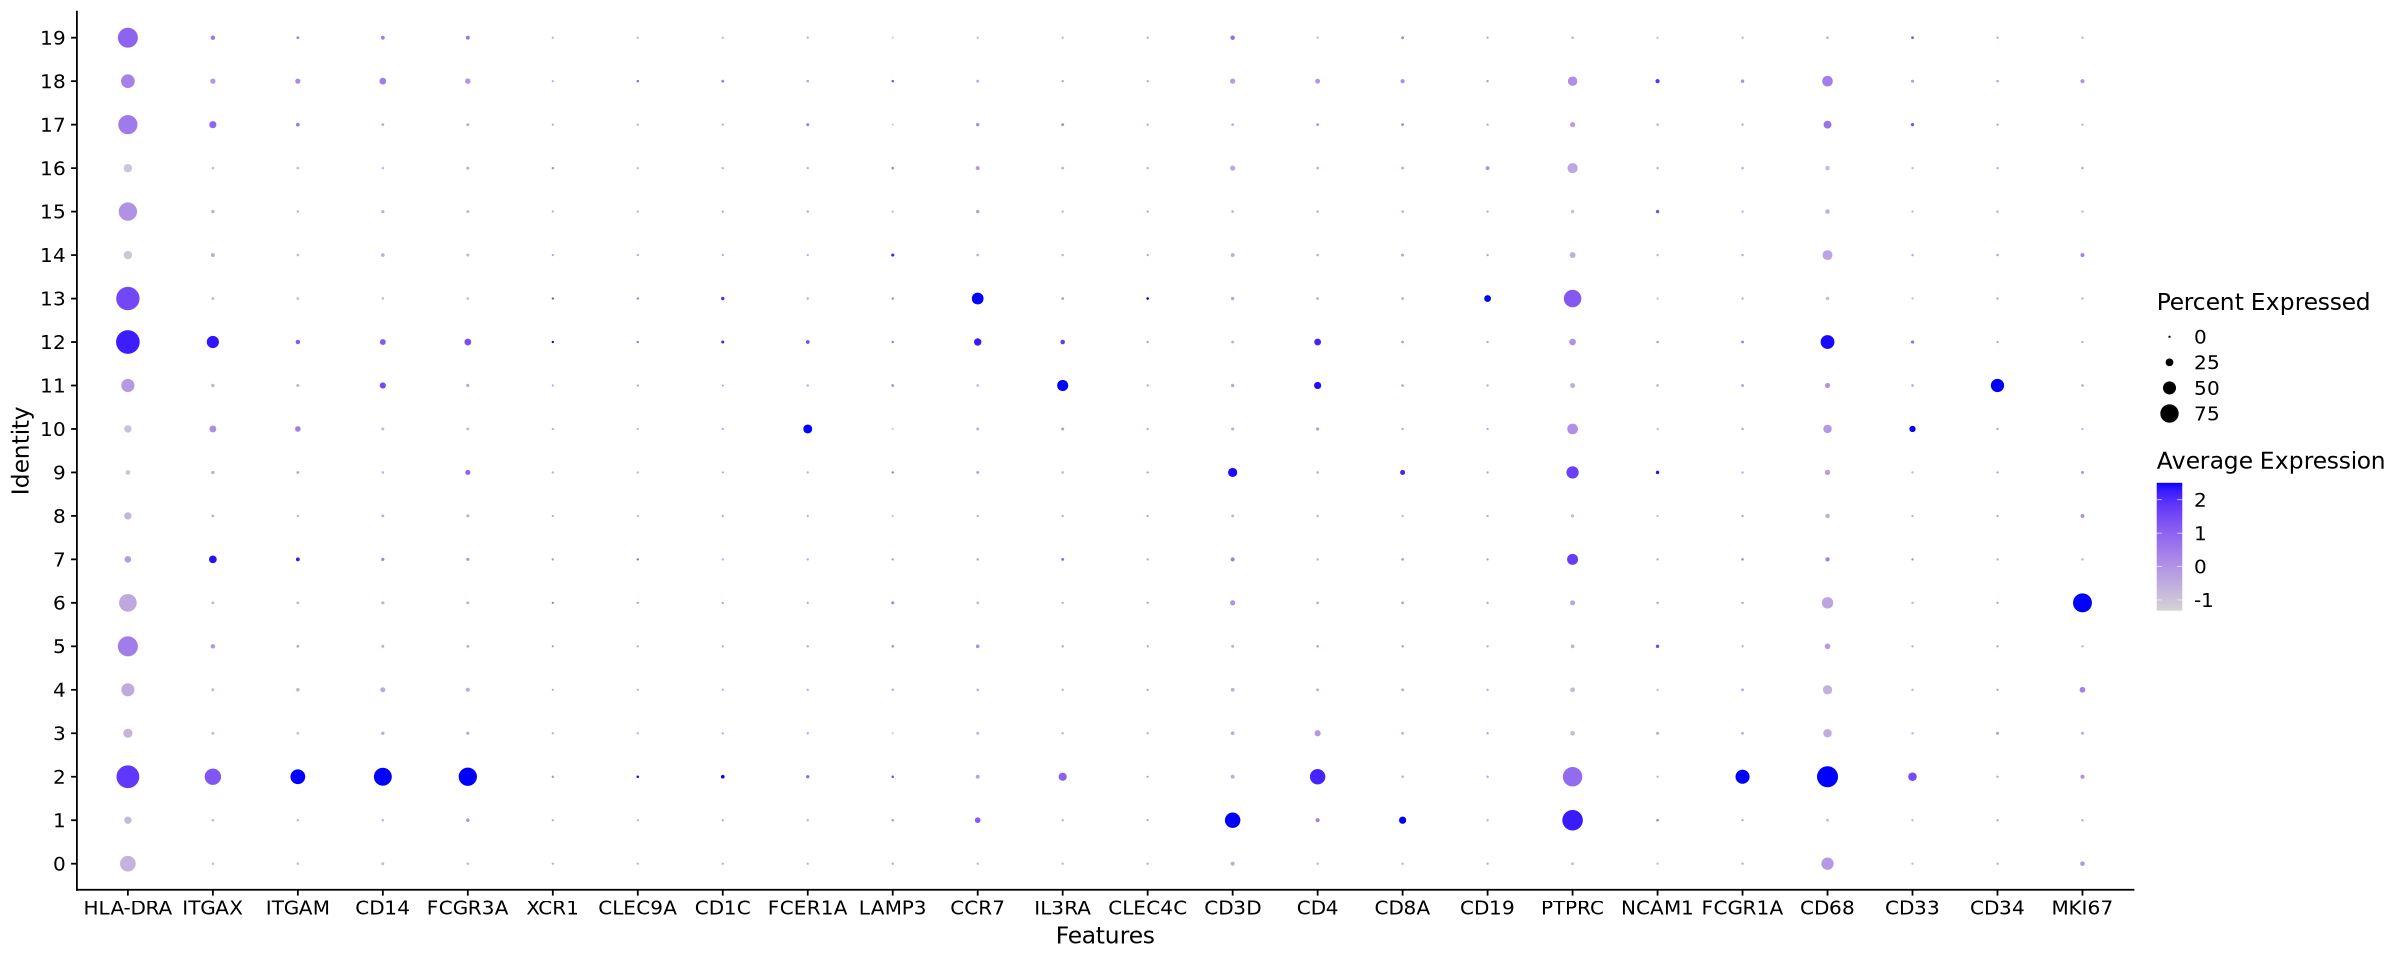

In [24]:
#Same as above but dot plot
options(repr.plot.height=8, repr.plot.width=20)
DotPlot(PDAC, features = c("HLA-DRA", "ITGAX", "ITGAM", "CD14", "FCGR3A", "XCR1", "CLEC9A", "CD1C", "FCER1A", "LAMP3", "CCR7", "IL3RA", "CLEC4C", "CD3D", "CD4", "CD8A", "CD19", "PTPRC", "NCAM1", "FCGR1A", "CD68", "CD33", "CD34", "MKI67"))
     

#### From above it looks like cluster 2 contains myeloid cells, subsetting out cluster 2

In [25]:
head(PDAC@meta.data)

orig.ident nCount_RNA nFeature_RNA
GSE197177_Case1-YF_AAACCCAAGAGCACTG-1 GSE197177   4039       946        
GSE197177_Case1-YF_AAACCCAAGCTAATCC-1 GSE197177  20821      4845        
GSE197177_Case1-YF_AAACCCAAGGCTGTAG-1 GSE197177  12284      3575        
GSE197177_Case1-YF_AAACCCAAGTTGAATG-1 GSE197177   3451      1062        
GSE197177_Case1-YF_AAACCCACAAACAGGC-1 GSE197177   4832      1772        
GSE197177_Case1-YF_AAACCCACAACTAGAA-1 GSE197177   4951      1950        
                                      sample_type cancer_type patient_id
GSE197177_Case1-YF_AAACCCAAGAGCACTG-1 tumour      PDAC        Case1     
GSE197177_Case1-YF_AAACCCAAGCTAATCC-1 tumour      PDAC        Case1     
GSE197177_Case1-YF_AAACCCAAGGCTGTAG-1 tumour      PDAC        Case1     
GSE197177_Case1-YF_AAACCCAAGTTGAATG-1 tumour      PDAC        Case1     
GSE197177_Case1-YF_AAACCCACAAACAGGC-1 tumour      PDAC        Case1     
GSE197177_Case1-YF_AAACCCACAACTAGAA-1 tumour      PDAC        Case1     
                                      sample_id                   percent.mt
GSE197177_Case1-YF_AAACCCAAGAGCACTG-1 GSE197177_PDAC_Case1_tumour 58.133201 
GSE197177_Case1-YF_AAACCCAAGCTAATCC-1 GSE197177_PDAC_Case1_tumour 16.502570 
GSE197177_Case1-YF_AAACCCAAGGCTGTAG-1 GSE197177_PDAC_Case1_tumour  5.698470 
GSE197177_Case1-YF_AAACCCAAGTTGAATG-1 GSE197177_PDAC_Case1_tumour 50.970733 
GSE197177_Case1-YF_AAACCCACAAACAGGC-1 GSE197177_PDAC_Case1_tumour  3.849338 
GSE197177_Case1-YF_AAACCCACAACTAGAA-1 GSE197177_PDAC_Case1_tumour 24.257726 
                                      RNA_snn_res.0.2 seurat_clusters
GSE197177_Case1-YF_AAACCCAAGAGCACTG-1 0               0              
GSE197177_Case1-YF_AAACCCAAGCTAATCC-1 0               0              
GSE197177_Case1-YF_AAACCCAAGGCTGTAG-1 0               0              
GSE197177_Case1-YF_AAACCCAAGTTGAATG-1 0               0              
GSE197177_Case1-YF_AAACCCACAAACAGGC-1 4               4              
GSE197177_Case1-YF_AAACCCACAACTAGAA-1 0               0

In [26]:
myeloid_PDAC <- subset(PDAC, subset = RNA_snn_res.0.2 %in% c("2"))

In [27]:
myeloid_PDAC

An object of class Seurat 
33538 features across 9726 samples within 1 assay 
Active assay: RNA (33538 features, 2000 variable features)
 17 layers present: counts.1, counts.2, counts.3, counts.4, counts.5, counts.6, counts.7, counts.8, data.1, data.2, data.3, data.4, data.5, data.6, data.7, data.8, scale.data
 2 dimensional reductions calculated: pca, umap

In [28]:
saveRDS(myeloid_PDAC, "/scratch/user/s4436039/scdata/GSE197177/GSE197177_myeloid.RDS")

Following the above then need to move entire GSE197177 folder from scratch to rdm
``` bash
rsync -azvhp /scratch/user/s4436039/scdata/GSE197177/ /QRISdata/Q5935/nikita/scdata/GSE197177
```